## Análisis Exploratorio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSVs corregidos
df1 = pd.read_csv("import_2024.csv", parse_dates=["Fecha"])
df2 = pd.read_csv("import_2025.csv", parse_dates=["Fecha"])
df = pd.concat([df1, df2], ignore_index=True)

# Asegurar que la columna "Fecha" esté en formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

# Verifica si hubo problemas de conversión
if df["Fecha"].isnull().any():
    print("⚠️ Advertencia: Algunas fechas no se pudieron convertir.")

df["Año"] = df["Fecha"].dt.year
df["Mes"] = df["Fecha"].dt.month

print("Columnas disponibles:")
print(df.columns.tolist())

# Seleccionamos columnas de interés
columnas_relevantes = [
    "Fecha",
    "Año",
    "Mes",
    "Gasolina regular",
    "Gasolina superior",
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre",
    "Gas licuado de petróleo"
]

df_filtrado = df[columnas_relevantes].copy()

# Normalizamos el nombre del diésel
df_filtrado["Diesel_total"] = (
    df_filtrado[["Diesel bajo azufre", "Diesel ultra bajo azufre", "Diesel alto azufre"]].sum(axis=1)
)

# --- Seleccionamos las columnas relevantes ---
combustibles = ['Gasolina regular', 'Gasolina superior', 'Diesel_total', 'Gas licuado de petróleo']

print(df_filtrado[combustibles].describe())

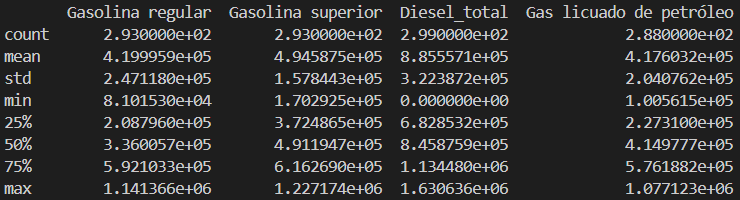

### Importación de gasolina por mes

In [ ]:
# 1. Tendencia general
df_filtrado.set_index("Fecha")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].plot(figsize=(12, 6))
plt.title("Importación mensual por tipo de combustible")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mes con más importación por tipo
for col in ["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]:
    max_row = df_filtrado.loc[df_filtrado[col].idxmax()]
    print(f"Máximo de {col}: {max_row[col]:,.0f} en {max_row['Fecha'].date()}")

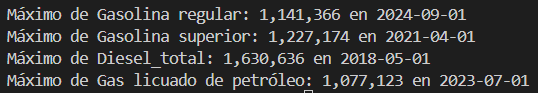

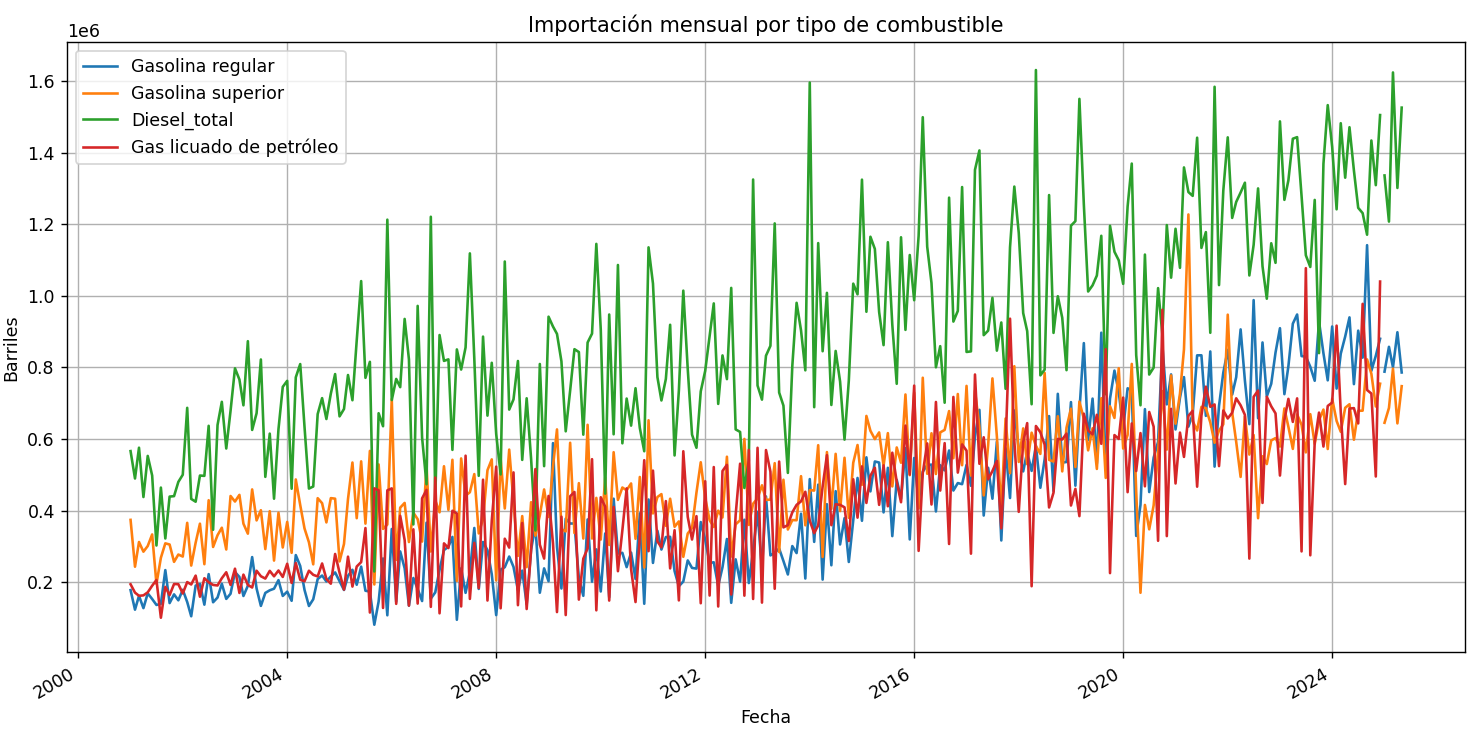

### Picos en importaciones por año

In [ ]:
for col in combustibles:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_filtrado, x="Año", y=col)
    plt.title(f"Picos anuales de importación: {col}")
    plt.ylabel("Volumen")
    plt.show()

# 2. Promedios anuales
df_anual = df_filtrado.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].sum()
df_anual.plot(kind="bar", figsize=(12, 6))
plt.title("Importación anual por tipo de combustible")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

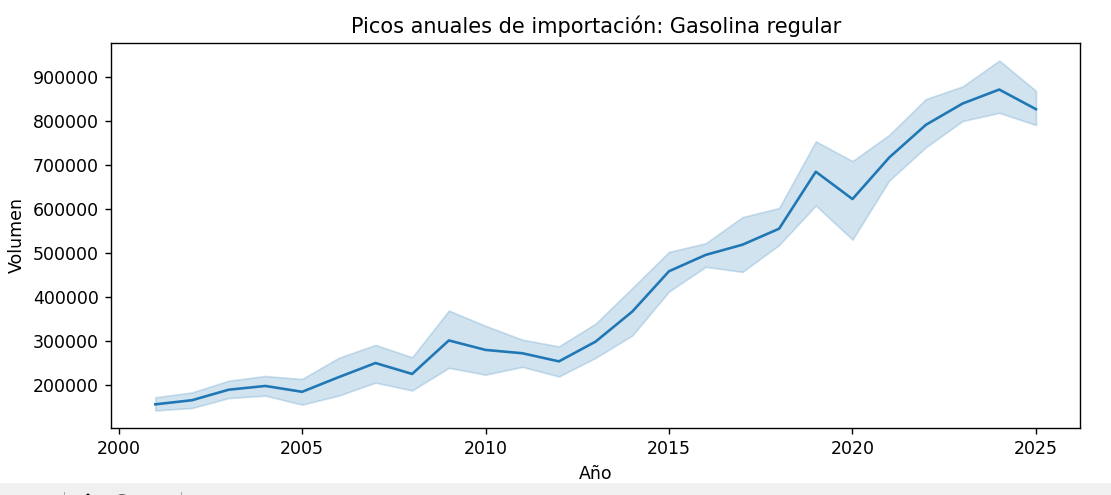
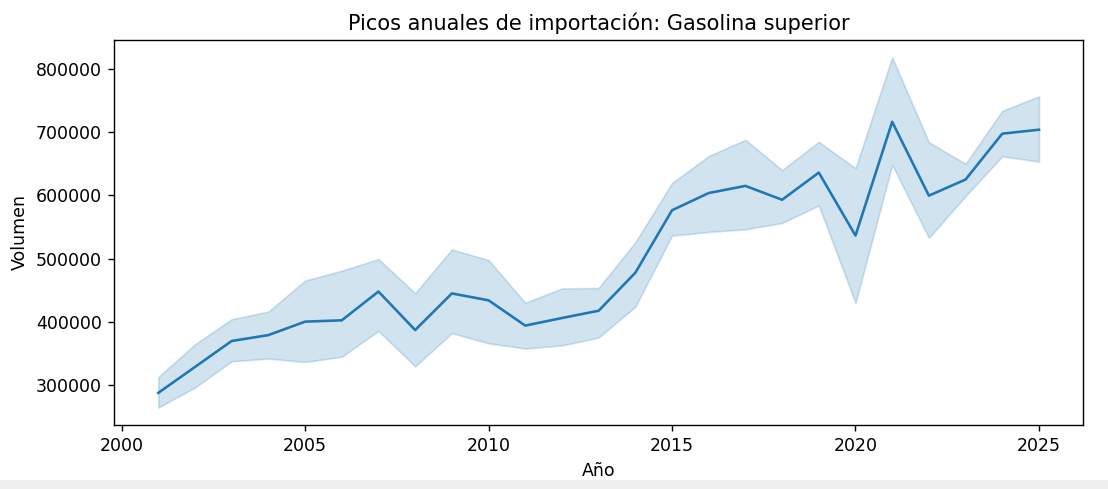
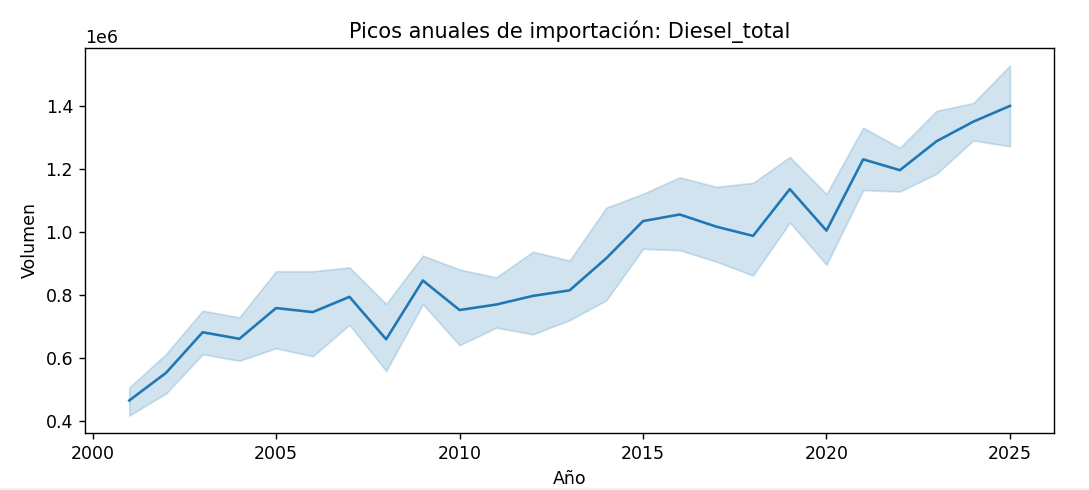
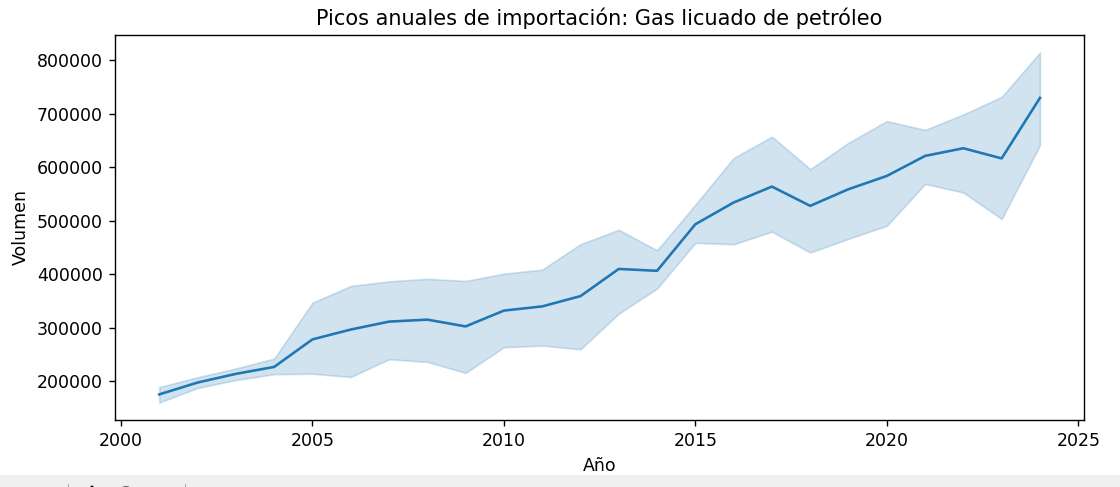

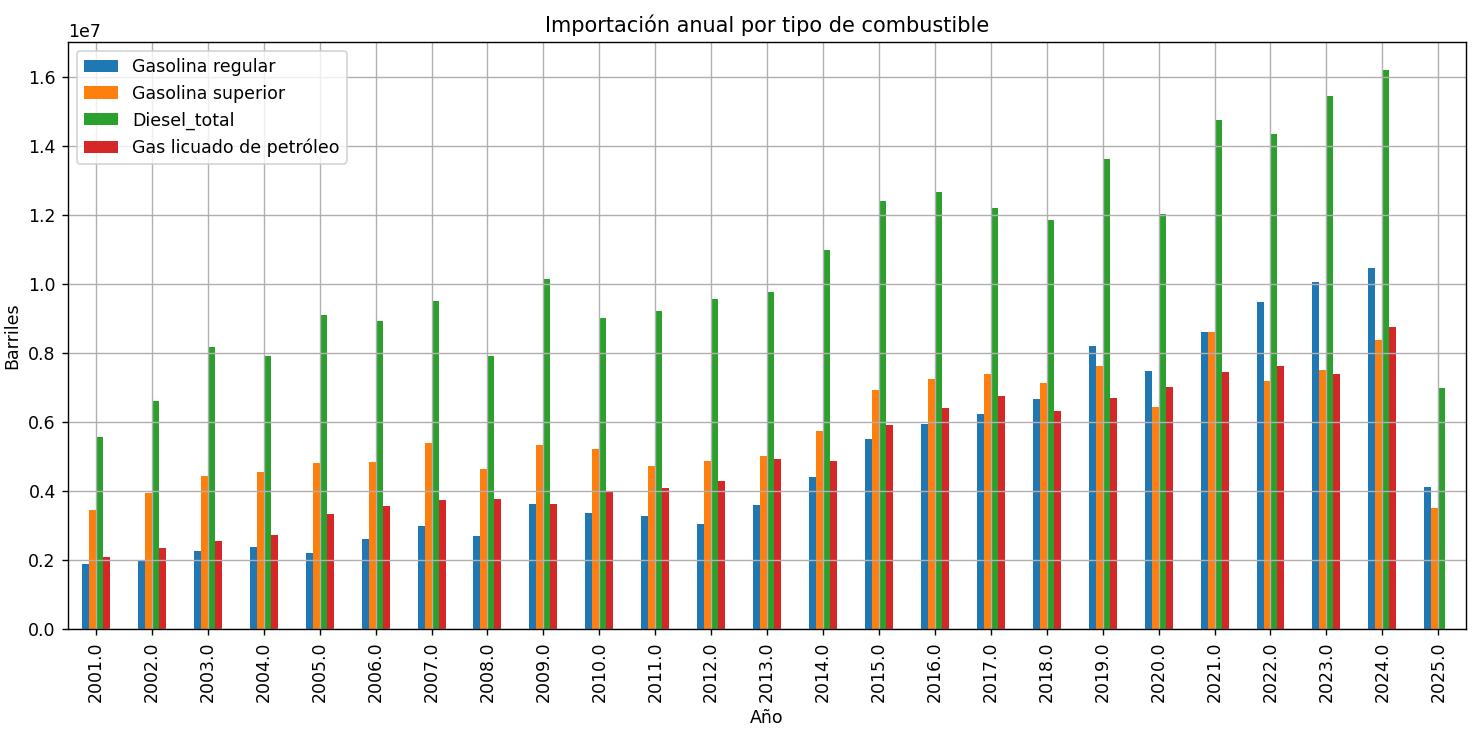

### Comportamiento en últimos años

In [ ]:
x = 5
últimos_años = sorted(df["Año"].unique())[-x:]
df_ultimos = df_filtrado[df["Año"].isin(últimos_años)]

plt.figure(figsize=(10, 5))
for col in combustibles:
    sns.lineplot(data=df_ultimos, x="Fecha", y=col, label=col)

plt.title(f"Comportamiento de importaciones en los últimos {x} años")
plt.ylabel("Volumen")
plt.legend()
plt.show()

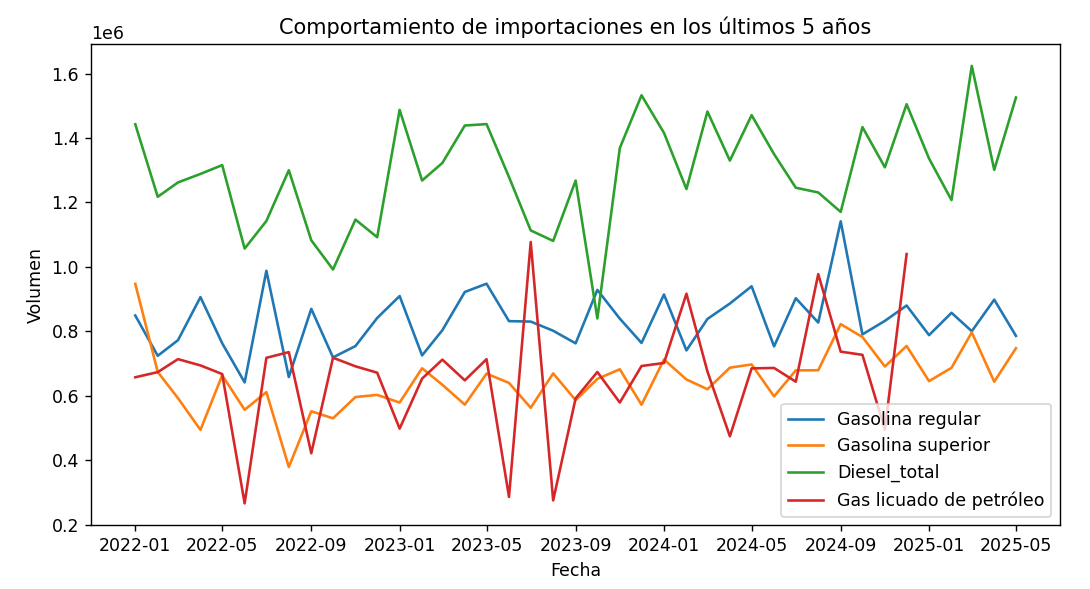

### Comportamiento en pandemia

In [ ]:
pandemia = df_filtrado[df_filtrado["Año"].between(2020, 2021)]
pandemia.set_index("Fecha")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].plot(figsize=(12, 5))
plt.title("Comportamiento durante pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

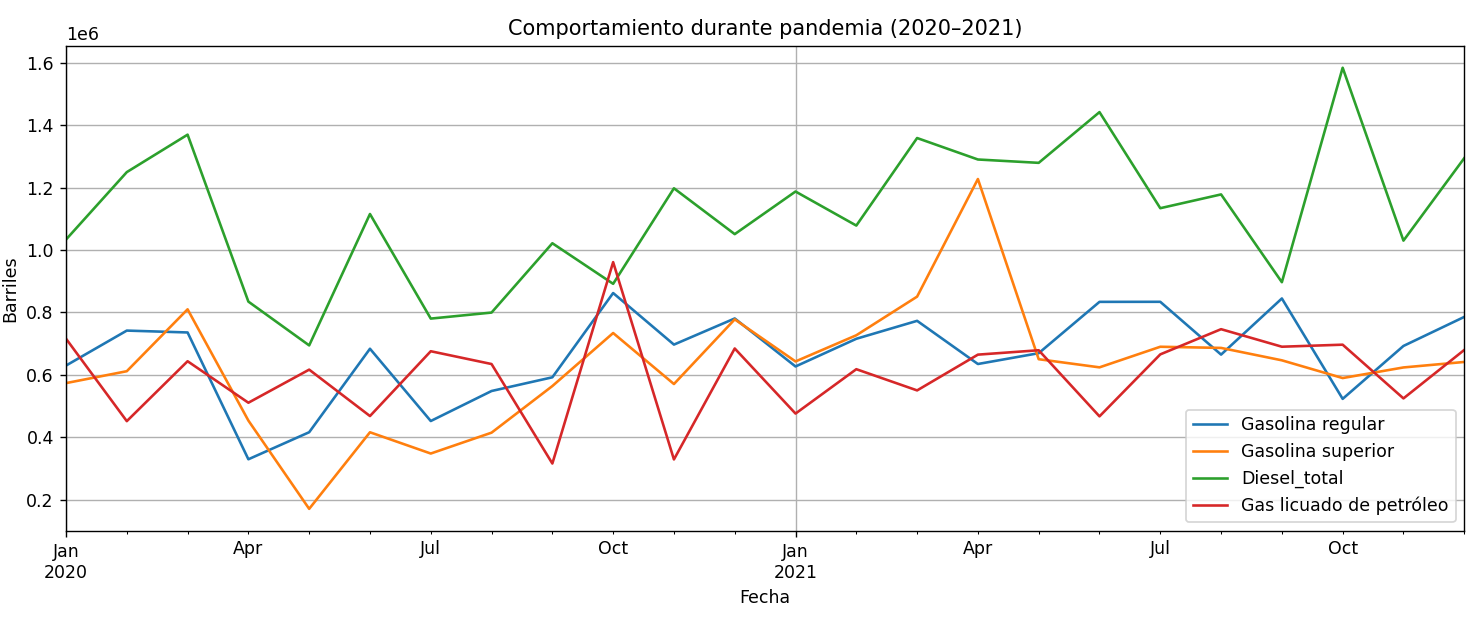